In [ ]:
# !pip install kaggle 

In [1]:
from kaggle.api.kaggle_api_extended import  KaggleApi

In [2]:
api = KaggleApi()
api.authenticate()

In [ ]:
# api.competition_download_file('sentiment-analysis-on-movie-reviews','train.tsv.zip', path='./')

100%|██████████| 1.28M/1.28M [00:00<00:00, 5.51MB/s]

In [ ]:
# import zipfile
# with zipfile.ZipFile('train.tsv.zip','r') as zipref:
#     zipref.extractall('./')

In [1]:
import pandas as pd 

In [4]:
df = pd.read_csv('train.tsv', sep='\t')

In [5]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [6]:
df.drop_duplicates(subset='SentenceId', keep='first', inplace=True)

In [7]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
63,64,2,"This quiet , introspective and entertaining in...",4
81,82,3,"Even fans of Ismail Merchant 's work , I suspe...",1
116,117,4,A positively thrilling combination of ethnogra...,3
156,157,5,Aggressive self-glorification and a manipulati...,1


In [8]:
len(df)

8529

In [9]:
seqlen = df['Phrase'].apply(lambda x: len(x.split()))

In [2]:
import seaborn as sns 
import matplotlib.pyplot as plt 

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Phrase', ylabel='Density'>

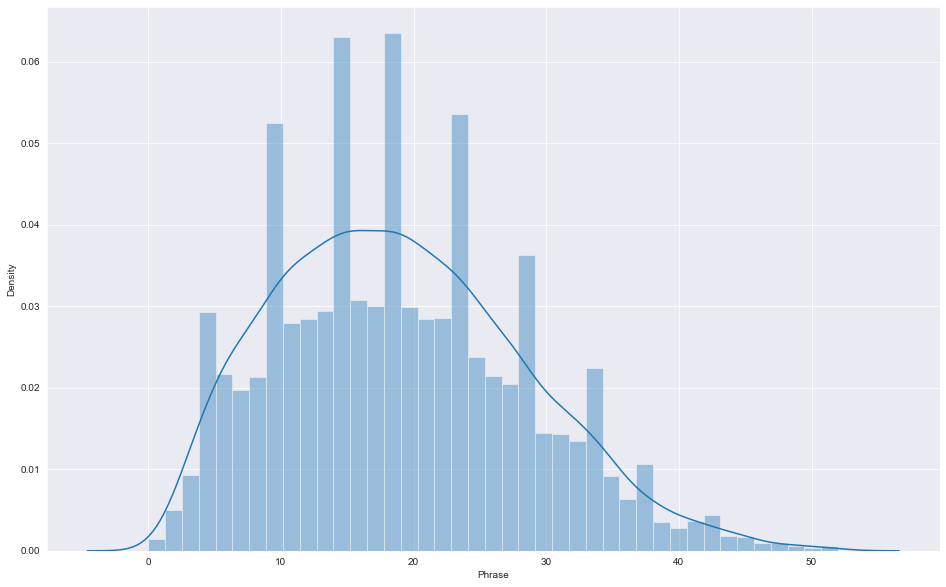

In [11]:
sns.set_style('darkgrid')
plt.figure(figsize=(16, 10))
sns.distplot(seqlen)

In [3]:
SEQ_LEN = 50

In [4]:
from transformers import AutoTokenizer

In [5]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

In [15]:
tokens = tokenizer.encode_plus("hello world", max_length=SEQ_LEN, truncation=True, padding="max_length", add_special_tokens=True, return_token_type_ids=False, return_attention_mask=True, return_tensors='tf')

In [16]:
tokens

{'input_ids': <tf.Tensor: shape=(1, 50), dtype=int32, numpy=
array([[  101, 19082,  1362,   102,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0]])>, 'attention_mask': <tf.Tensor: shape=(1, 50), dtype=int32, numpy=
array([[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]])>}

In [6]:
import numpy as np 


In [19]:
Xids = np.zeros((len(df), SEQ_LEN))
Xmask = np.zeros((len(df), SEQ_LEN))


In [20]:
Xids.shape

(8529, 50)

In [21]:
for i, sequence in enumerate(df['Phrase']):
    tokens = tokenizer.encode_plus(sequence, max_length=SEQ_LEN, truncation=True, padding="max_length", add_special_tokens=True, return_token_type_ids=False, return_attention_mask=True, return_tensors='tf')
    Xids[i, :], Xmask[i, :] = tokens['input_ids'], tokens['attention_mask']

In [22]:
Xids

array([[ 101.,  138., 1326., ...,    0.,    0.,    0.],
       [ 101., 1188., 3589., ...,    0.,    0.,    0.],
       [ 101., 2431., 3899., ...,    0.,    0.,    0.],
       ...,
       [ 101.,  118.,  149., ...,    0.,    0.,    0.],
       [ 101., 1109., 2523., ...,    0.,    0.,    0.],
       [ 101., 1109., 1273., ...,    0.,    0.,    0.]])

In [23]:
Xmask

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [24]:
df['Sentiment'].unique()

array([1, 4, 3, 2, 0], dtype=int64)

In [26]:
arr = df['Sentiment'].values 
labels = np.zeros((arr.size, arr.max()+1))
labels.shape 

(8529, 5)

In [27]:
labels[np.arange(arr.size), arr] = 1
labels

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [28]:
with open('xids.npy', 'wb') as f:
    np.save(f, Xids)
with open('xmask.npy', 'wb') as f:
    np.save(f, Xmask)
with open('labels.npy', 'wb') as f:
    np.save(f, labels)

del df, Xids, Xmask, labels 

In [24]:
with open('xids.npy', 'rb') as f:
    Xids = np.load(f)
with open('xmask.npy', 'rb') as f:
    Xmask = np.load(f)
with open('labels.npy', 'rb') as f:
    labels = np.load(f)

In [25]:
Xids 

array([[ 101.,  138., 1326., ...,    0.,    0.,    0.],
       [ 101., 1188., 3589., ...,    0.,    0.,    0.],
       [ 101., 2431., 3899., ...,    0.,    0.,    0.],
       ...,
       [ 101.,  118.,  149., ...,    0.,    0.,    0.],
       [ 101., 1109., 2523., ...,    0.,    0.,    0.],
       [ 101., 1109., 1273., ...,    0.,    0.,    0.]])

In [26]:
import tensorflow as tf 
tf.config.experimental.list_physical_devices('GPU')

[]

In [27]:
 dataset = tf.data.Dataset.from_tensor_slices((Xids, Xmask, labels))

In [28]:
for i in dataset.take(1):
    print(i)

(<tf.Tensor: shape=(50,), dtype=float64, numpy=
array([  101.,   138.,  1326.,  1104., 13936., 25265., 16913., 15107.,
        1103.,  8050.,  2553.,  1115.,  1184.,  1110.,  1363.,  1111.,
        1103., 20398.,  1110.,  1145.,  1363.,  1111.,  1103.,   176.,
        9900.,   117.,  1199.,  1104.,  1134.,  5411.,  1821., 14225.,
        1133.,  3839.,  1104.,  1134.,  7919.,  1106.,  1277.,  1104.,
         170.,  1642.,   119.,   102.,     0.,     0.,     0.,     0.,
           0.,     0.])>, <tf.Tensor: shape=(50,), dtype=float64, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.])>, <tf.Tensor: shape=(5,), dtype=float64, numpy=array([0., 1., 0., 0., 0.])>)


In [29]:
def map_func(input_ids, masks, labels):
    return {'input_ids': input_ids, 'attention_mask': masks}, labels

In [30]:
dataset = dataset.map(map_func)

In [31]:
for i in dataset.take(1):
    print(i)

({'input_ids': <tf.Tensor: shape=(50,), dtype=float64, numpy=
array([  101.,   138.,  1326.,  1104., 13936., 25265., 16913., 15107.,
        1103.,  8050.,  2553.,  1115.,  1184.,  1110.,  1363.,  1111.,
        1103., 20398.,  1110.,  1145.,  1363.,  1111.,  1103.,   176.,
        9900.,   117.,  1199.,  1104.,  1134.,  5411.,  1821., 14225.,
        1133.,  3839.,  1104.,  1134.,  7919.,  1106.,  1277.,  1104.,
         170.,  1642.,   119.,   102.,     0.,     0.,     0.,     0.,
           0.,     0.])>, 'attention_mask': <tf.Tensor: shape=(50,), dtype=float64, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.])>}, <tf.Tensor: shape=(5,), dtype=float64, numpy=array([0., 1., 0., 0., 0.])>)


In [32]:
dataset = dataset.shuffle(100000).batch(32)

In [33]:
DS_LEN = len(list(dataset))

In [34]:
DS_LEN

267

In [35]:
# get the length of the batched dataset
DS_LEN = len([0 for batch in dataset])
SPLIT = 0.9  # 90-10 split

train = dataset.take(round(DS_LEN*SPLIT))  # get first 90% of batches
val = dataset.skip(round(DS_LEN*SPLIT))  # skip first 90% and keep final 10%

del dataset  # optionally, delete dataset to free up disk-space

In [43]:
'''Our data is now ready and we can define our model architecture. We will use BERT, followed by an LSTM layer, and some simple NN layers. Those final layers following BERT are our classifier.''' 


'Our data is now ready and we can define our model architecture. We will use BERT, followed by an LSTM layer, and some simple NN layers. Those final layers following BERT are our classifier.'

In [40]:
from transformers import TFAutoModel

# initialize cased BERT model
bert = TFAutoModel.from_pretrained('bert-base-cased')

input_ids = tf.keras.layers.Input(shape=(50,), name='input_ids', dtype='int32')
mask = tf.keras.layers.Input(shape=(50,), name='attention_mask', dtype='int32')

# we consume the last_hidden_state tensor from bert (discarding pooled_outputs)
embeddings = bert(input_ids, attention_mask=mask)[0]

X = tf.keras.layers.LSTM(64)(embeddings)
X = tf.keras.layers.BatchNormalization()(X)
X = tf.keras.layers.Dense(64, activation='relu')(X)
X = tf.keras.layers.Dropout(0.1)(X)
y = tf.keras.layers.Dense(5, activation='softmax', name='outputs')(X)

# define input and output layers of our model
model = tf.keras.Model(inputs=[input_ids, mask], outputs=y)

# freeze the BERT layer - otherwise we will be training 100M+ parameters...
model.layers[2].trainable = False

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [41]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 50)]         0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 50)]         0           []                               
                                                                                                  
 tf_bert_model_2 (TFBertModel)  TFBaseModelOutputWi  108310272   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 50,                                          

In [42]:
optimizer = tf.keras.optimizers.Adam(0.01)
loss = tf.keras.losses.CategoricalCrossentropy()  # categorical = one-hot
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

model.compile(optimizer=optimizer, loss=loss, metrics=[acc])



In [43]:
history = model.fit(train, validation_data=val, epochs=1)

240/240 [==============================] - 542s 2s/step - loss: 1.4062 - accuracy: 0.3784 - val_loss: 1.2669 - val_accuracy: 0.4547


In [44]:
model.predict(val)

27/27 [==============================] - 46s 2s/step


array([[0.02352773, 0.07750978, 0.18185654, 0.4475682 , 0.26953766],
       [0.00265267, 0.01917948, 0.05816766, 0.46049806, 0.45950213],
       [0.01605471, 0.06722598, 0.20709462, 0.4777573 , 0.23186737],
       ...,
       [0.0213732 , 0.07956854, 0.14487347, 0.4668116 , 0.2873732 ],
       [0.00072565, 0.00599328, 0.04077708, 0.3683013 , 0.5842027 ],
       [0.24113609, 0.3984204 , 0.22386283, 0.10893413, 0.02764661]],
      dtype=float32)